In [33]:
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
%matplotlib inline

train, test = tf.contrib.keras.datasets.mnist.load_data()
X = test[0]
color = np.zeros((len(test[1]), 10))
for n, idx in enumerate(test[1]):
    color[n, idx] = 1
color = np.dot(color, np.random.rand(10,3))    
print(color)    
print('データ数{}'.format(test[1].shape[0]))

n_neighbors = 10
n_components = 2

[[ 0.7563168   0.96632484  0.1540508 ]
 [ 0.84130331  0.56905992  0.70735294]
 [ 0.18133033  0.7275972   0.15835337]
 ..., 
 [ 0.08792628  0.56225164  0.67754421]
 [ 0.1848575   0.11425361  0.84420141]
 [ 0.40147787  0.9273154   0.78594148]]
データ数10000


ValueError: Found array with dim 3. Estimator expected <= 2.

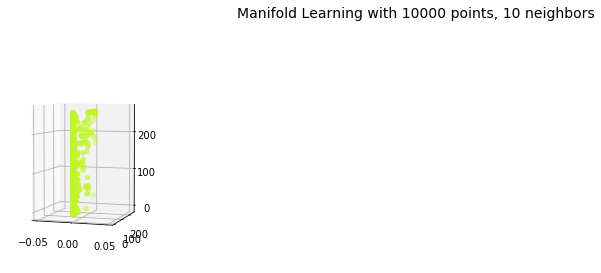

In [36]:
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (10000, n_neighbors), fontsize=14)

try:
    # compatibility matplotlib < 1.0
    ax = fig.add_subplot(251, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.view_init(4, -72)
except:
    ax = fig.add_subplot(251, projection='3d')
    plt.scatter(X[:, 0], X[:, 2], c=color, cmap=plt.cm.Spectral)

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=Set3)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')


plt.show()